In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
repertoire_types = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal','T_cell_poor_polyclonal']

In [3]:
columns = ['th', 'observed_portion_frequency', 'class']
df_MIXCR = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_MIXCR_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100
    
    df_temp_aa['class'] = repertoire

    df_MIXCR = pd.concat([df_MIXCR, df_temp_aa], ignore_index=True, sort=False)
    df_MIXCR['tool'] = 'MIXCR'

In [4]:
columns = ['th', 'observed_portion_frequency', 'class']
df_IMREP = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_IMREP_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_IMREP = pd.concat([df_IMREP, df_temp_aa], ignore_index=True, sort=False)
    df_IMREP['tool'] = 'IMREP'

In [5]:
columns = ['th', 'observed_portion_frequency', 'class']
df_TRUST4 = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_TRUST4_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_TRUST4 = pd.concat([df_TRUST4, df_temp_aa], ignore_index=True, sort=False)
    df_TRUST4['tool'] = 'TRUST4'

In [6]:
df_combined = pd.concat([df_MIXCR,df_IMREP,df_TRUST4], ignore_index=True, sort=False)
df_combined

,th,observed_portion_frequency,class,tool
0,0.000,0.928713,T_cell_rich_monoclonal,MIXCR
1,0.001,0.943874,T_cell_rich_monoclonal,MIXCR
2,0.002,0.946668,T_cell_rich_monoclonal,MIXCR
3,0.003,0.979478,T_cell_rich_monoclonal,MIXCR
4,0.004,0.989179,T_cell_rich_monoclonal,MIXCR
...,...,...,...,...
1199995,99.996,NaN,T_cell_poor_polyclonal,TRUST4
1199996,99.997,NaN,T_cell_poor_polyclonal,TRUST4
1199997,99.998,NaN,T_cell_poor_polyclonal,TRUST4
1199998,99.999,NaN,T_cell_poor_polyclonal,TRUST4


# MIXCR

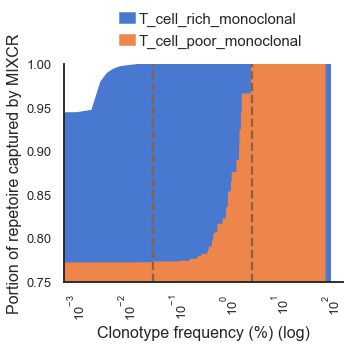

In [7]:
T_cell_rich_monoclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_monoclonal']
T_cell_poor_monoclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_poor_monoclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_monoclonal_MIXCR['th'], T_cell_rich_monoclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_rich_monoclonal"],color=['#4878d0'])
ax.stackplot(T_cell_poor_monoclonal_MIXCR['th'], T_cell_poor_monoclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_poor_monoclonal"],color=['#ee854a'])
value1 = T_cell_rich_monoclonal_MIXCR.loc[T_cell_rich_monoclonal_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_monoclonal_MIXCR.loc[T_cell_poor_monoclonal_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

fig.savefig("../figures/main/figure1_a1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_a1.png",bbox_inches="tight")

plt.show()

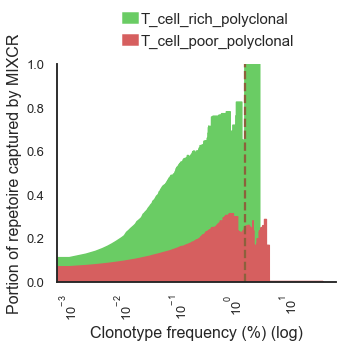

In [8]:
T_cell_rich_polyclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_polyclonal']
T_cell_poor_polyclonal_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_polyclonal_MIXCR['th'], T_cell_rich_polyclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_rich_polyclonal"],color=['#6acc64'])
ax.stackplot(T_cell_poor_polyclonal_MIXCR['th'], T_cell_poor_polyclonal_MIXCR['observed_portion_frequency'], labels=["T_cell_poor_polyclonal"],color=['#d65f5f'])

value1 = T_cell_rich_polyclonal_MIXCR.loc[T_cell_rich_polyclonal_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

fig.savefig("../figures/main/figure1_b1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_b1.png",bbox_inches="tight")

plt.show()

# IMREP

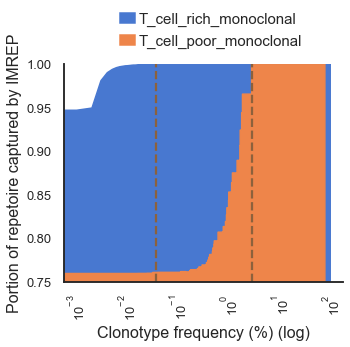

In [9]:
T_cell_rich_monoclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_monoclonal']
T_cell_poor_monoclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_poor_monoclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_monoclonal_IMREP['th'], T_cell_rich_monoclonal_IMREP['observed_portion_frequency'], labels=["T_cell_rich_monoclonal"],color=['#4878d0'])
ax.stackplot(T_cell_poor_monoclonal_IMREP['th'], T_cell_poor_monoclonal_IMREP['observed_portion_frequency'], labels=["T_cell_poor_monoclonal"],color=['#ee854a'])

value1 = T_cell_rich_monoclonal_IMREP.loc[T_cell_rich_monoclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_monoclonal_IMREP.loc[T_cell_poor_monoclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

fig.savefig("../figures/main/figure1_a2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_a2.png",bbox_inches="tight")

plt.show()

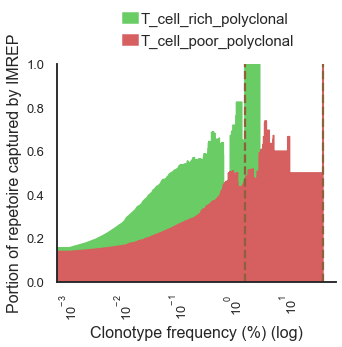

In [10]:
T_cell_rich_polyclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_polyclonal']
T_cell_poor_polyclonal_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_polyclonal_IMREP['th'], T_cell_rich_polyclonal_IMREP['observed_portion_frequency'], labels=["T_cell_rich_polyclonal"],color=['#6acc64'])
ax.stackplot(T_cell_poor_polyclonal_IMREP['th'], T_cell_poor_polyclonal_IMREP['observed_portion_frequency'], labels=["T_cell_poor_polyclonal"],color=['#d65f5f'])

value1 = T_cell_rich_polyclonal_IMREP.loc[T_cell_rich_polyclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_polyclonal_IMREP.loc[T_cell_poor_polyclonal_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

fig.savefig("../figures/main/figure1_b2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_b2.png",bbox_inches="tight")

plt.show()

# TRUST4

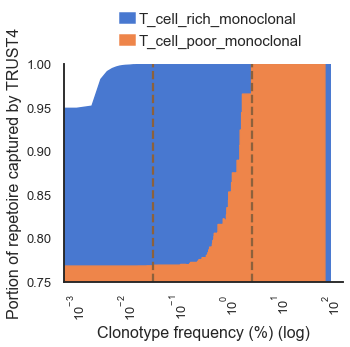

In [11]:
T_cell_rich_monoclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_monoclonal']
T_cell_poor_monoclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_poor_monoclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_monoclonal_TRUST4['th'], T_cell_rich_monoclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_rich_monoclonal"],color=['#4878d0'])
ax.stackplot(T_cell_poor_monoclonal_TRUST4['th'], T_cell_poor_monoclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_poor_monoclonal"],color=['#ee854a'])

value1 = T_cell_rich_monoclonal_TRUST4.loc[T_cell_rich_monoclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_monoclonal_TRUST4.loc[T_cell_poor_monoclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

fig.savefig("../figures/main/figure1_a3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_a3.png",bbox_inches="tight")

plt.show(block=False)

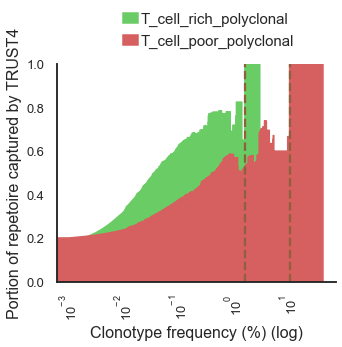

In [12]:
T_cell_rich_polyclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_polyclonal']
T_cell_poor_polyclonal_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 4))

ax.stackplot(T_cell_rich_polyclonal_TRUST4['th'], T_cell_rich_polyclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_rich_polyclonal"],color=['#6acc64'])
ax.stackplot(T_cell_poor_polyclonal_TRUST4['th'], T_cell_poor_polyclonal_TRUST4['observed_portion_frequency'], labels=["T_cell_poor_polyclonal"],color=['#d65f5f'])

value1 = T_cell_rich_polyclonal_TRUST4.loc[T_cell_rich_polyclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
value2 = T_cell_poor_polyclonal_TRUST4.loc[T_cell_poor_polyclonal_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.3), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

fig.savefig("../figures/main/figure1_b3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure1_b3.png",bbox_inches="tight")

plt.show()

In [13]:
portion = df_combined.loc[df_combined['th'] == 0]
mean_portion = portion.groupby(["class"])["observed_portion_frequency"].agg(["mean", "std"]) 
display(mean_portion)

,mean,std
class,,
T_cell_poor_monoclonal,0.766121,0.006156
T_cell_poor_polyclonal,0.132534,0.065727
T_cell_rich_monoclonal,0.931769,0.002864
T_cell_rich_polyclonal,0.114097,0.027053


In [14]:
df = pd.read_csv("../summary_data/original/all_tools_TRB.csv")
df = df.loc[~(df['frequency_TCR'] == 0)]
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,repertoire_type,class
0,SRR5233637,CASSPRVTSGTYEQYF,32.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000010,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
1,SRR5233637,CASSYSDRGGQPQHF,13.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000004,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
2,SRR5233637,CASKVALGGETQYF,25.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000008,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
3,SRR5233637,CASRAPGTGTLGSPLHF,66.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000022,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
4,SRR5233637,CASSSGQGGPSTEAFF,52.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000017,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375300,sample14,CASSPRVAIVYNEQFF,4.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000005,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
375301,sample14,CASSYRQSGELFF,77.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000103,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
375302,sample14,CASSQGGSGGPGELFF,48.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000064,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal
375303,sample14,CASSVSSGGFREVEQYF,15.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000020,0.0,0.0,0.0,polyclonal,T_cell_poor_polyclonal


In [15]:
# Select 5 clonotypes with the highest frequency for each sample 
df_top5 = pd.DataFrame()

samples = ['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
           'sample09','sample10','sample11','sample12','sample13','sample14','TCGA-CZ-4862',
           'TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637','SRR5233639','insilco_sample1','insilco_sample2','insilco_sample3']

for sample in samples: 
    df_sample = df.loc[df['Sample'] == sample]
    df_temp_top = df_sample.nlargest(5,'frequency_TCR')
    
    df_top5 = pd.concat([df_top5, df_temp_top], ignore_index=True, sort=False)

In [16]:
## Calculate the coverage of the top 5 clonotypes by each tool 
# TCR 
TCR_top5 = df_top5.groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TCR'].count().reset_index().rename(columns={'frequency_TCR':'count_TCR_top5'})

# MIXCR
MIXCR_top5 = df_top5[df_top5['frequency_MIXCR'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_MIXCR'].count().reset_index().rename(columns={'frequency_MIXCR':'count_tool_top5'})
MIXCR_top5 = pd.merge(TCR_top5, MIXCR_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
MIXCR_top5['tool'] = 'MIXCR'

# IMREP
IMREP_top5 = df_top5[df_top5['frequency_IMREP'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_IMREP'].count().reset_index().rename(columns={'frequency_IMREP':'count_tool_top5'})
IMREP_top5 = pd.merge(TCR_top5, IMREP_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
IMREP_top5['tool'] = 'IMREP'

# TRUST4
TRUST4_top5 = df_top5[df_top5['frequency_TRUST4'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TRUST4'].count().reset_index().rename(columns={'frequency_TRUST4':'count_tool_top5'})
TRUST4_top5 = pd.merge(TCR_top5, TRUST4_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
TRUST4_top5['tool'] = 'TRUST4'

overlap_count_top5 = pd.concat([MIXCR_top5,IMREP_top5,TRUST4_top5],ignore_index=True)
overlap_count_top5['overlap_percentage'] = overlap_count_top5['count_tool_top5']/overlap_count_top5['count_TCR_top5']*100

In [17]:
mean_overlap_percentage = overlap_count_top5.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
display(mean_overlap_percentage)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = overlap_count_top5.loc[overlap_count_top5['tool'] == tool]
    mean_overlap_percentage = df_tool.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
    display(mean_overlap_percentage)

,mean,std
class,,
T_cell_poor_monoclonal,40.000000,0.000000
T_cell_poor_polyclonal,38.888889,30.963368
T_cell_rich_monoclonal,97.777778,6.666667
T_cell_rich_polyclonal,66.666667,36.055513


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,40.000000,NaN
T_cell_poor_polyclonal,31.666667,34.59725
T_cell_rich_monoclonal,100.000000,0.00000
T_cell_rich_polyclonal,66.666667,41.63332


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,40.000000,NaN
T_cell_poor_polyclonal,36.666667,29.336088
T_cell_rich_monoclonal,93.333333,11.547005
T_cell_rich_polyclonal,60.000000,34.641016


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,40.000000,NaN
T_cell_poor_polyclonal,48.333333,28.867513
T_cell_rich_monoclonal,100.000000,0.000000
T_cell_rich_polyclonal,73.333333,46.188022


In [18]:
# Select 10 clonotypes with the highest frequency for each sample 
df_top10 = pd.DataFrame()

samples = ['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
           'sample09','sample10','sample11','sample12','sample13','sample14','TCGA-CZ-4862',
           'TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637','SRR5233639','insilco_sample1','insilco_sample2','insilco_sample3']

for sample in samples: 
    df_sample = df.loc[df['Sample'] == sample]
    df_temp_top = df_sample.nlargest(10,'frequency_TCR')
    
    df_top10 = pd.concat([df_top10, df_temp_top], ignore_index=True, sort=False)

In [19]:
## Calculate the coverage of the top 10 clonotypes by each tool 
# TCR 
TCR_top10 = df_top10.groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TCR'].count().reset_index().rename(columns={'frequency_TCR':'count_TCR_top10'})

# MIXCR
MIXCR_top10 = df_top10[df_top10['frequency_MIXCR'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_MIXCR'].count().reset_index().rename(columns={'frequency_MIXCR':'count_tool_top10'})
MIXCR_top10 = pd.merge(TCR_top10, MIXCR_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
MIXCR_top10['tool'] = 'MIXCR'

# IMREP
IMREP_top10 = df_top10[df_top10['frequency_IMREP'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_IMREP'].count().reset_index().rename(columns={'frequency_IMREP':'count_tool_top10'})
IMREP_top10 = pd.merge(TCR_top10, IMREP_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
IMREP_top10['tool'] = 'IMREP'

# TRUST4
TRUST4_top10 = df_top10[df_top10['frequency_TRUST4'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TRUST4'].count().reset_index().rename(columns={'frequency_TRUST4':'count_tool_top10'})
TRUST4_top10 = pd.merge(TCR_top10, TRUST4_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
TRUST4_top10['tool'] = 'TRUST4'

overlap_count_top10 = pd.concat([MIXCR_top10,IMREP_top10,TRUST4_top10],ignore_index=True)
overlap_count_top10['overlap_percentage'] = overlap_count_top10['count_tool_top10']/overlap_count_top10['count_TCR_top10']*100

In [20]:
mean_overlap_percentage = overlap_count_top10.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
display(mean_overlap_percentage)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = overlap_count_top10.loc[overlap_count_top10['tool'] == tool]
    mean_overlap_percentage = df_tool.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
    display(mean_overlap_percentage)

,mean,std
class,,
T_cell_poor_monoclonal,20.000000,0.000000
T_cell_poor_polyclonal,32.222222,29.675494
T_cell_rich_monoclonal,92.222222,8.333333
T_cell_rich_polyclonal,52.222222,37.006006


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,20.000000,NaN
T_cell_poor_polyclonal,25.000000,28.762349
T_cell_rich_monoclonal,93.333333,5.773503
T_cell_rich_polyclonal,50.000000,45.825757


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,20.000000,NaN
T_cell_poor_polyclonal,29.166667,28.109634
T_cell_rich_monoclonal,86.666667,11.547005
T_cell_rich_polyclonal,46.666667,40.414519


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,20.000000,NaN
T_cell_poor_polyclonal,42.500000,31.658691
T_cell_rich_monoclonal,96.666667,5.773503
T_cell_rich_polyclonal,60.000000,40.000000
